<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/test_accuracy_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
# import stanfordnlp
# import import_ipynb
import json
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
property_ = "speaking"
file1 = open("gables_{}withtoken_list.txt".format(property_), "r")

sentences_gables = []

target_pre_gables = []

file1_lines =file1.readlines()

for i in range(len(file1_lines)):
  if i%2==0:
    sentences_gables.append(file1_lines[i])
  else:
    target_pre_gables.append(file1_lines[i])

    
# for i in range(len(file2_lines)):
#   if i%2==0:
#     sentence_dreams.append([file2_lines[i]])
#   else:
#     target_dreams.append([int(file2_lines[i])])
# file.close()

In [0]:
file = open("montgomery.gables.tokens")
tokens = pd.read_csv("montgomery.gables.tokens", sep="\t")

In [0]:
sentences_gables[0][:-2][1:re.search("(\d)", sentences_gables[0][:-2]).span()[0]]

'"`` She \'s father \'s aunt and she lives in Charlottetown . She \'s awfully old -- seventy anyhow -- and I do n\'t believe she was _ ever _ a little girl . We were expecting her out for a visit , but not so soon . She \'s awfully prim and proper and she \'ll scold dreadfully about this , I know . Well , we \'ll have to sleep with Minnie May -- and you ca n\'t think how she kicks . \'\' ", '

In [0]:
tokenids = [int(sentences_gables[i][:-2][re.search("\d", sentences_gables[i][:-2]).span()[0]:]) for i in range(len(sentences_gables))]
sentence_by_id = [sentences_gables[i][:-2][1:re.search("\d", sentences_gables[i][:-2]).span()[0]] for i in range(len(sentences_gables))]
# target_pre_gables

In [0]:
# anno_frame = pd.DataFrame({"tokenids": tokenids, "sentences": sentence_by_id, "targets": target_pre_gables})
# anno_frame = anno_frame.sample(frac=1).reset_index(drop=True)
# anno_frame.to_csv("shuffled_annotable_gables.csv")

In [0]:
anno_frame = pd.read_csv("shuffled_annotable_gables.csv")

In [0]:
def annotate_helper(i):
  token = anno_frame.iloc[i]["tokenids"]
  return tokens[tokens["paragraphId"]==int(tokens[tokens["tokenId"]==token]["paragraphId"])]["originalWord"], tokens[tokens["sentenceID"]==int(tokens[tokens["tokenId"]==token]["sentenceID"])]["originalWord"]

In [32]:
annotate_helper(104)

(1046          “
 1047          I
 1048        ’ll
 1049       just
 1050       step
          ...   
 1174         of
 1175    Avonlea
 1176      today
 1177          .
 1178          ”
 Name: originalWord, Length: 133, dtype: object, 1076            “
 1077           He
 1078         does
 1079          n’t
 1080    generally
 1081           go
 1082           to
 1083         town
 1084         this
 1085         time
 1086           of
 1087         year
 1088          and
 1089           he
 1090            _
 1091        never
 1092            _
 1093       visits
 1094            ;
 1095           if
 1096           he
 1097           ’d
 1098          run
 1099          out
 1100           of
 1101       turnip
 1102         seed
 1103           he
 1104        would
 1105          n’t
 1106        dress
 1107           up
 1108          and
 1109         take
 1110          the
 1111        buggy
 1112           to
 1113           go
 1114          for
 1115         more
 1116

In [0]:
target_true_gables = ["Anne", "Marilla", "Marilla", "Anne", "Anne", "Anne", "Anne", "Anne", "Matthew", "Anne", "Marilla", "Jane", "Anne", "-1", "Anne", 
                     "Diana", "Diana", "Mr. Philips", "Marilla", "Marilla", "Diana", "Marilla", "Marilla", "Josie", "Anne", "Matthew", "Gilbert",
                     "Marilla", "Marilla", "-1", "Diana", "Anne", "Mrs. Barry", "Jane", "Anne", "Anne", "Anne", "Mrs. Barry", "Matthew", "Marilla", 
                     "Anne", "Matthew", "Marilla", "Anne", "Marilla", "Josie", "Mrs. Lynde", "Diana", "Mrs. Spencer", "Anne", "Anne", "Anne", "Marilla", 
                     "Marilla", "Marilla", "Anne", "Marilla", "Mrs. Lynde", "Anne", "Mrs. Lynde", "Anne", "Anne", "Anne", "Anne", "-1", "Anne", "Anne",
                     "Anne", "Anne", "Marilla", "Anne", "Mrs. Lynde", "Matthew", "Anne", "Anne", "Marilla", "Marilla", "Matthew", "Marilla", "Anne", "Anne", 
                     "Marilla", "Anne", "Anne", "Mrs. Lynde", "Mrs. Spencer", "Matthew", "Matthew", "Marilla", "Marilla", "Anne", "Mrs. Lynde", 
                     "Anne", "Anne", "Anne", "Marilla", "Marilla", "Mrs. Allan", "Matthew", "Anne", 
                     "Anne", "Anne", "Marilla", "Anne", "Mrs. Lynde", "Matthew", 
                      "Anne", "Anne", "Marilla", "Anne", "Mrs. Spencer", "Diana", "Gilbert", "Anne", "Anne", "Matthew", "Marilla", "Anne", "Marilla", 
                      "Anne", "Matthew", "Diana", "Anne", "Anne", "Diana", "Marilla", "Anne", "Marilla", "Anne", "Josie", "Anne", "Anne", "Anne", "Mrs. Lynde",
                      "Anne", "Marilla", "Marilla", "Anne", "Mrs. Lynde", "-1", "Anne", "Anne", "Marilla", "Matthew", "Marilla", "Anne", "Marilla", "Diana", 
                      "Anne", "Matthew"]

In [27]:
len(["Anne", "Marilla", "Marilla", "Anne", "Anne", "Anne", "Anne", "Anne", "Matthew", "Anne", "Marilla", "Jane", "Anne", "-1", "Anne", 
                     "Diana", "Diana", "Mr. Philips", "Marilla", "Marilla", "Diana", "Marilla", "Marilla", "Josie", "Anne", "Matthew", "Gilbert",
                     "Marilla", "Marilla", "-1", "Diana", "Anne", "Mrs. Barry", "Jane", "Anne", "Anne", "Anne", "Mrs. Barry", "Matthew", "Marilla", 
                     "Anne", "Matthew", "Marilla", "Anne", "Marilla", "Josie", "Mrs. Lynde", "Diana", "Mrs. Spencer", "Anne", "Anne", "Anne", "Marilla", 
                     "Marilla", "Marilla", "Anne", "Marilla", "Mrs. Lynde", "Anne", "Mrs. Lynde", "Anne", "Anne", "Anne", "Anne", "-1", "Anne", "Anne",
                     "Anne", "Anne", "Marilla", "Anne", "Mrs. Lynde", "Matthew", "Anne", "Anne", "Marilla", "Marilla", "Matthew", "Marilla", "Anne", "Anne", 
                     "Marilla", "Anne", "Anne", "Mrs. Lynde", "Mrs. Spencer", "Matthew", "Matthew", "Marilla", "Marilla", "Anne", "Mrs. Lynde", 
                     "Anne", "Anne", "Anne", "Marilla", "Marilla", "Mrs. Allan", "Matthew", "Anne"])

100

In [0]:
def accuracy_checker(target_pre, target_true, n):
  total_corr = 0
  if len(target_pre[:n])!=len(target_true):
    print("mismatched lengths, check")
  for i in range(len(target_pre[:n])):
    if target_true[i] in target_pre[i].split(","):
      total_corr+=1
  return total_corr/n, target_true.count("Anne")/len(target_true)

In [38]:
accuracy_checker(list(anno_frame["targets"]), target_true_gables, 150)

(0.72, 0.4266666666666667)

In [0]:
# len(["Anne", "Marilla", "Marilla", "Anne", "Anne", "Anne", "Anne", "Anne", "Matthew", "Anne", "Marilla", "Jane", "Anne", "-1", "Anne", 
#                      "Diana", "Diana", "Mr. Philips", "Marilla", "Marilla", "Diana", "Marilla", "Marilla", "Josie", "Anne", "Matthew", "Gilbert",
#                      "Marilla", "Marilla", "-1", "Diana", "Anne", "Mrs. Barry", "Jane", "Anne", "Anne", "Anne", "Mrs. Barry", "Matthew", "Marilla", 
#                      "Anne", "Matthew", "Marilla", "Anne", "Marilla", "Josie", "Mrs. Lynde", "Diana", "Mrs. Spencer", "Anne", "Anne", "Anne", "Marilla", 
#                      "Marilla", "Marilla", "Anne", "Marilla", "Mrs. Lynde", "Anne", "Mrs. Lynde", "Anne", "Anne", "Mrs. Allan"])

63

In [39]:
print(150/len(anno_frame))

0.1282051282051282


In [0]:
ch = []
n = []
for i in target_true_gables:
  if i not in ch:
    ch.append(i)
    n.append(target_true_gables.count(i)/150)

Text(0.5, 1.0, "Proportion of quotations of each character's true quotations")

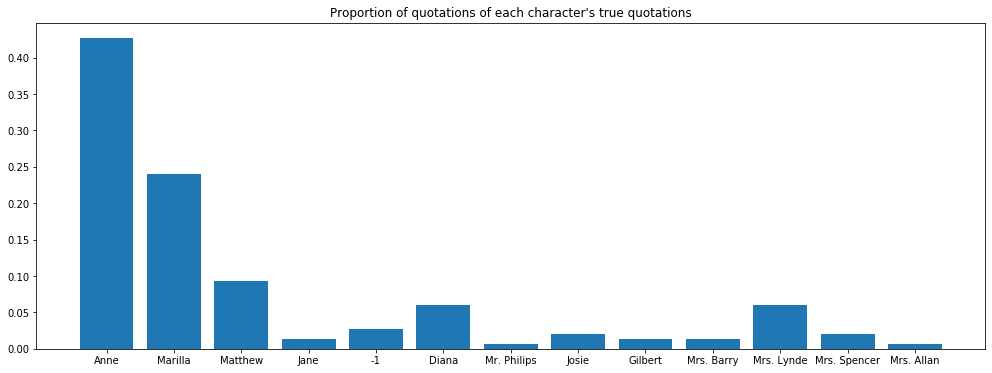

In [88]:
plt.figure(figsize=(17, 6))
plt.bar(ch, n)
plt.title("Proportion of quotations of each character's true quotations")

In [0]:
ch_pr = []
n_pr = []
for i in anno_frame["targets"][:150]:
  in_now = False
  for e in i.split(","):
    if e in ch_pr:
      in_now = True
  if in_now == False:
    ch_pr.append(i.split(",")[1])
    n_pr.append(list(anno_frame["targets"][:150]).count(i)/150)

Text(0.5, 1.0, "Proportion of quotations of each character's predicted quotations")

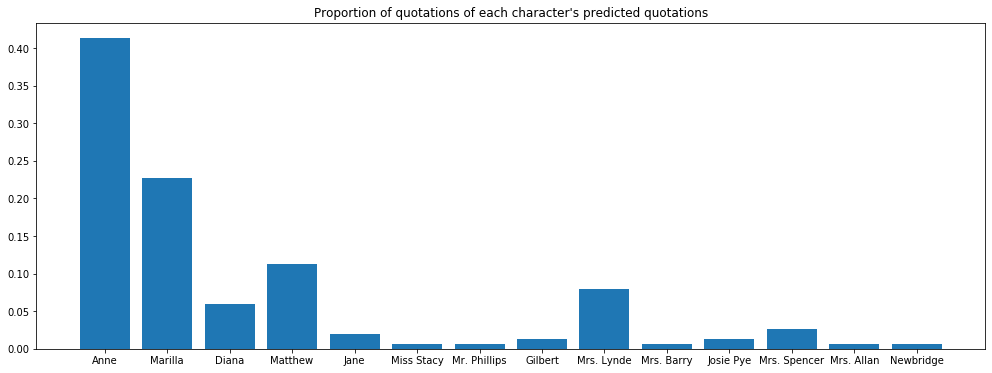

In [90]:
plt.figure(figsize=(17, 6))
plt.bar(ch_pr, n_pr)
plt.title("Proportion of quotations of each character's predicted quotations")